# Exploratory Data Analysis using Python - A Case Study

*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

### Part 9 of "Data Analysis with Python: Zero to Pandas"

This tutorial is the ninth in a series on the introduction to programming and data analysis using the Python language. These tutorials take a practical coding-based approach, and the best way to learn the material is to execute the code and experiment with the examples. Check out the full series here: 

1. [First Steps with Python and Jupyter](https://jovian.ml/aakashns/first-steps-with-python)
2. [A Quick Tour of Variables and Data Types](https://jovian.ml/aakashns/python-variables-and-data-types)
3. [Branching using Conditional Statements and Loops](https://jovian.ml/aakashns/python-branching-and-loops)
4. [Writing Reusable Code Using Functions](https://jovian.ml/aakashns/python-functions-and-scope)
5. [Reading from and Writing to Files](https://jovian.ml/aakashns/python-os-and-filesystem)
6. [Numerical Computing with Python and Numpy](https://jovian.ml/aakashns/python-numerical-computing-with-numpy)
7. [Analyzing Tabular Data using Pandas](https://jovian.ml/aakashns/python-pandas-data-analysis)
8. [Data Visulation using Matplotlib & Seaborn](https://jovian.ml/aakashns/python-matplotlib-data-visualization)
9. [Exploratory Data Analysis - A Case Study](https://jovian.ml/aakashns/python-eda-stackoverflow-survey)

## How to run the code

This tutorial hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects online. You can "run" this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

>  This tutorial is a [Jupyter notebook](https://jupyter.org) - a document made of "cells", which can contain explanations in text or code written in Python. Code cells can be executed and their outputs e.g. numbers, messages, graphs, tables, files etc. can be viewed within the notebook, which makes it a really powerful platform for experimentation and analysis. Don't afraid to experiment with the code & break things - you'll learn a lot by encoutering and fixing errors. You can use the "Kernel > Restart & Clear Output" menu option to clear all outputs and start again from the top of the notebook.

### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


### Option 2: Running on your computer locally

You'll need to install Python and download this notebook on your computer to run in locally. We recommend using the [Conda](https://docs.conda.io/en/latest/) distribution of Python. Here's what you need to do to get started:

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Make sure to add Conda binaries to your system `PATH` to be able to run the `conda` command line tool from your Mac/Linux terminal or Windows command prompt. 


2. Create and activate a [Conda virtual environment](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) called `zerotopandas` which you can use for this tutorial series:
```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
```
You'll need to create the environment only once, but you'll have to activate it every time want to run the notebook. When the environment is activated, you should be able to see a prefix `(zerotopandas)` within your terminal or command prompt.


3. Install the required Python libraries within the environment by the running the following command on your  terminal or command prompt:
```
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

4. Download the notebook for this tutorial using the `jovian clone` command:
```
jovian clone aakashns/python-eda-stackoverflow-survey
```
The notebook is downloaded to the directory `python-eda-stackoverflow-survey`.


5. Enter the project directory and start the Jupyter notebook:
```
cd python-eda-stackoverflow-survey
jupyter notebook
```

6. You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook `python-eda-stackoverflow-survey.ipynb` to open it and run the code. If you want to type out the code yourself, you can also create a new notebook using the "New" button.

## Introduction

We'll use the StackOverflow developer survey dataset for our analysis. This is an annual survey conducted by SO, and you find the raw data & results here: https://insights.stackoverflow.com/survey.

There are two options for getting the dataset:

- Download the CSV manually and upload it to Jupyter
- Use the `opendatasets` helper library, which contains a collection of curated datasets

We'll use the `opendatasets` helper library.

In [1]:
import opendatasets as od

In [2]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


Let's verify that the dataset was downloaded into the directory `stackoverflow-developer-survey-2020`, and retrieve the list of files in the dataset.

In [3]:
import os

In [4]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv', 'README.txt']

You can through the downloaded files using `File > Open` menu option in Jupyter. It seems like the dataset contains 3 files:

- `README.txt` - containing information about the dataset
- `survey_results_schema.csv` - containing the list of questions and the short codes for each question
- `survey_results_public.csv` - the full list of responses to the questions 

Let's load the CSV files using the Pandas library.

In [5]:
import pandas as pd

In [6]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [7]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64,000 responses to 60 questions (although many questions are optional). The responses have been anonymized and there's no personally identifiable information about respondents - just a Randomized respondent ID.

In [8]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

Short codes are used as column names. We can refer to the schema file to see the full text of each question.

In [9]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

In [10]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [11]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

We've now loaded the dataset, and are ready to move on to the next step of preprocessing & cleaning the data for our analysis.

### Save and upload your work

Whether you're running this Jupyter notebook on an online service like Binder or on your local machine, it's important to save your work from time, so that you can access it later, or share it online. You can upload this notebook to your Jovian.ml account using the `jovian` Python library.

In [12]:
# Select a project name
project='python-eda-stackoverflow-survey'

In [13]:
# Install the Jovian library
!pip install jovian --upgrade --quiet

In [14]:
import jovian

In [15]:
jovian.commit(project=project)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-eda-stackoverflow-survey" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/python-eda-stackoverflow-survey


'https://jovian.ml/aakashns/python-eda-stackoverflow-survey'

`jovian.commit` uploads the notebook to your [Jovian.ml](https://jovian.ml) account, captures the Python environment and creates a shareable link for your notebook as shown above. You can use this link to share your work and let anyone (including you) run your notebooks and reproduce your work.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents & the global programming community
- Distribution of programming skills, experience and preferences
- Employment-related information & preferences 

Let's select a subset of columns with the relevant data.

In [16]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [17]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame `survey_df`, which we can continue to modify further without affecting the original data frame.

In [18]:
survey_df = survey_raw_df[selected_columns].copy()

In [19]:
schema = schema_raw[selected_columns]

Let's view some basic information about the data frame.

In [20]:
survey_df.shape

(64461, 20)

In [21]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type object, either because they contain values of different types, or they contain empty values, which are represented `np.NaN`. It appears that every column contains some empty values, since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though there are a few other columns which have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types, while ignoring any non-numeric value (they will get converted to NaNs)

In [22]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's now view some basic statistics about the the numeric columns.

In [23]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and max value is 279. This is a common issues with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be ignore the rows where the value in the age column is higher than 100 years or lower than 10 years as invalid survey responses.

In [24]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same hold true for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours.

In [25]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows picking multiple options, but to simplify our analysis, we'll remove values containing options.

In [27]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [28]:
import numpy as np

In [29]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis.

In [30]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15.0,4.0,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,4.0,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,15.0,8.0,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,10.0,NaN,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


Let's save and commit our work before continuing.

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/python-eda-stackoverflow-survey" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/python-eda-stackoverflow-survey


'https://jovian.ml/aakashns/python-eda-stackoverflow-survey'

## Exploratory Data Analysis

### Country

Let's look at country stats

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [34]:
survey_df.Country.nunique()

183

Let's also check the fraction of empty values in this column.

In [35]:
survey_df.Country.isna().mean()

0.010885453923428608

Here are the countries with the highest number of respondents.

In [36]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can visualize this using a bar chart.

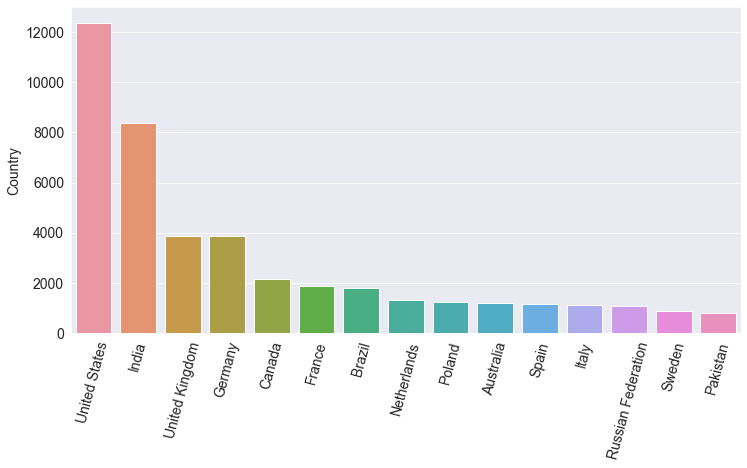

In [37]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
sns.barplot(top_countries.index, top_countries);

It appears the that a disproportionately high number of respondents are from USA & India - which one might expect since the Survey is in English. 

### Age

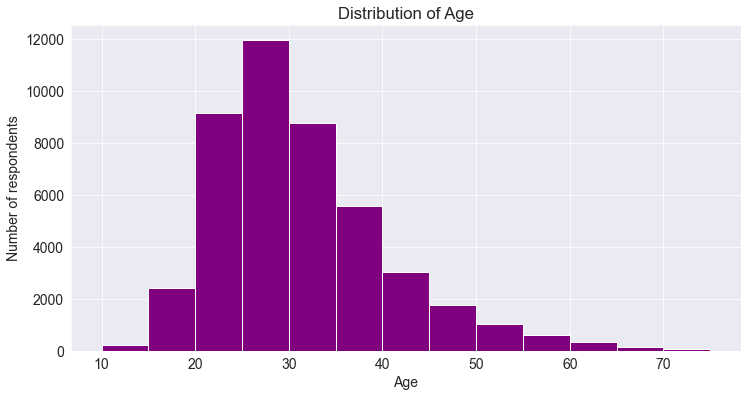

In [38]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

### Gender



In [39]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A pie chart would be a good way to represent this split.

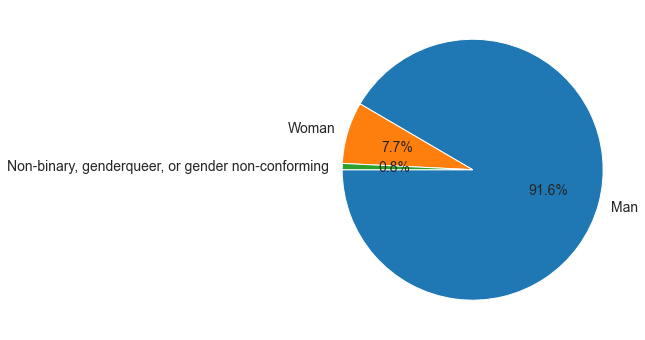

In [40]:
plt.figure(figsize=(12,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

### Education Level

Let's compare the education levels using a horizontal bar plot

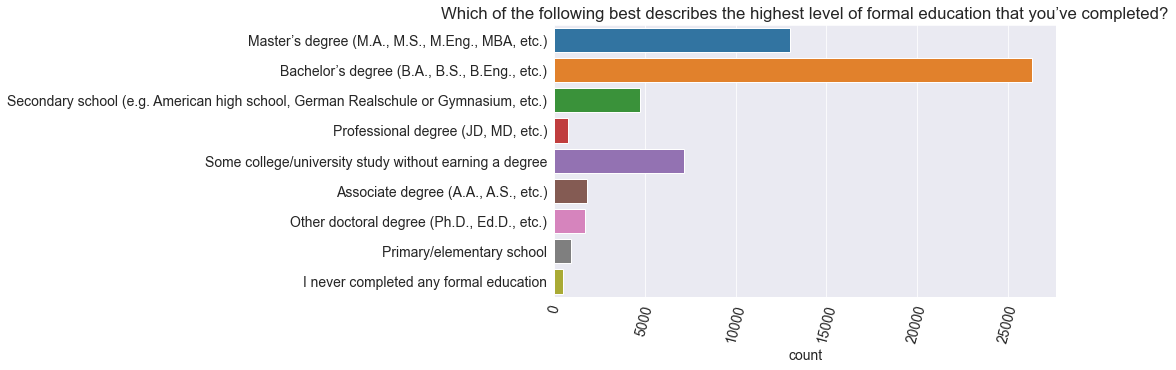

In [41]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

Let's also plot undergraduate majors, but this time use percentages, and sort by it.

Text(0.5, 0, 'Percentage')

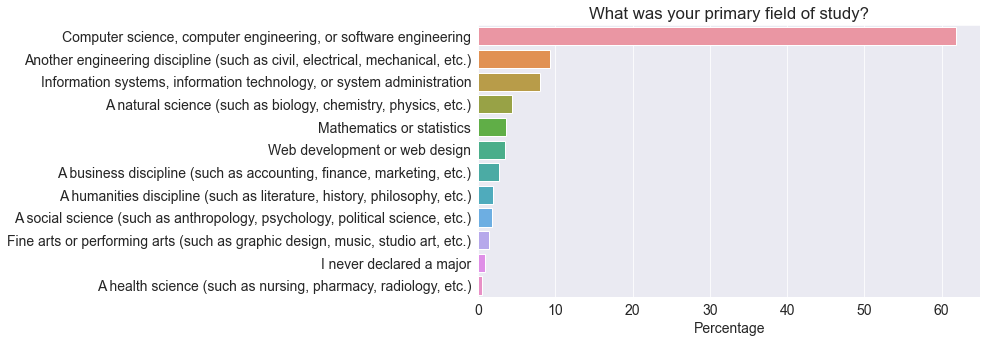

In [42]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(undergrad_pct, undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage')

### Employment

We can also plot directly using Pandas

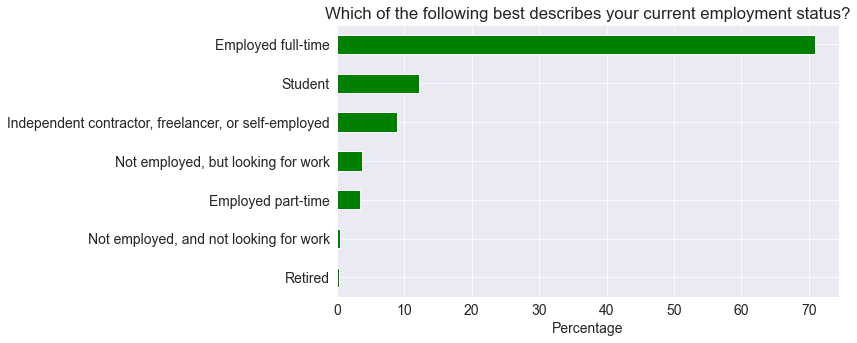

In [43]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

The `DevType` field is also relevant, but since the question allows multiple answers, the column contains lists of values separated by `;`, which makes it a bit harder to analyze directly.

In [44]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [46]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                              4396
Developer, back-end                                                                                                                                                                                                3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                     2214
Developer, back-end;Developer, full-stack                                                                                                                                                                          1465
Developer, front-end                                                                                                                    

Let's define a helper function which turns a column containing lists of values into a data frame with one column for each option.

In [95]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [96]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [99]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [108]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

And we can now plot it

Text(0.5, 0, 'count')

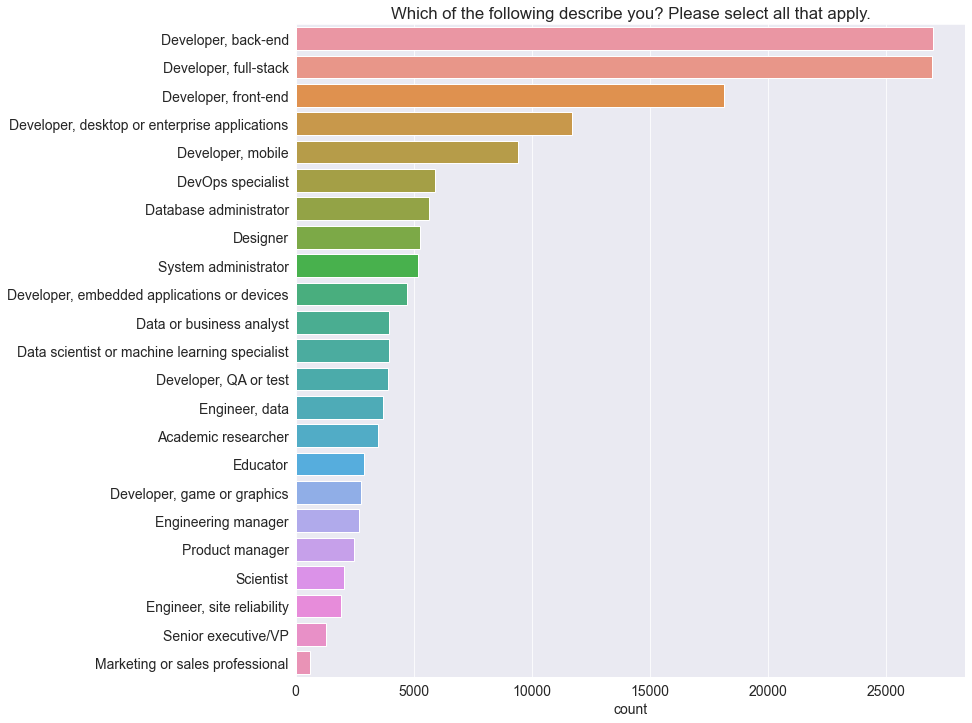

In [117]:
plt.figure(figsize=(12, 12))
sns.barplot(dev_type_totals, dev_type_totals.index)
plt.title(schema.DevType);
plt.xlabel('count')

Let's also create a scatter plot of `YearsCode` and `YearsCodePro`.

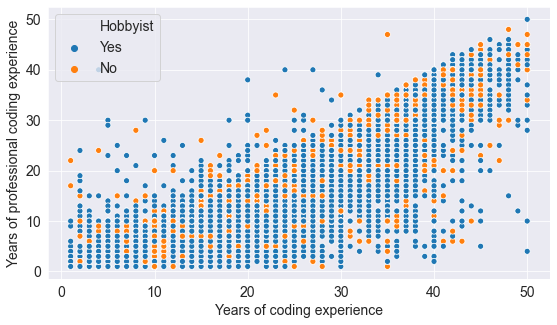

In [126]:
sns.scatterplot('YearsCode', 'YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Years of coding experience")
plt.ylabel("Years of professional coding experience");

There seems to be no correlation as such.

In [127]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Asking and Answering Questions

#### Q: Which were the most popular programming languages in 2020?

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType` it allowed choosing multiple

## Inferences and Conclusion

## References and Future Work

In [ ]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'DevType',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]